# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#lets see if we have the r2 scoring for cross validation
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

{'fit_time': array([0.00256038, 0.00221968, 0.0022068 , 0.00193286, 0.00210571]),
 'score_time': array([0.00180244, 0.00156736, 0.00144744, 0.00140047, 0.00188589]),
 'test_score': array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])}

## 3. Calculate and print R-squared for both the training and the testing set.

In [25]:
# we are going to use the R2 metric for evaluaiton
from sklearn import metrics
y_train_predict = lr.predict(X_train)
metrics.r2_score(y_train, y_train_predict).round(3)

0.761

In [26]:
y_test_predict = lr.predict(X_test)
metrics.r2_score(y_test, y_test_predict).round(3)

0.634

In [42]:
# we are going tto use cross validation
from sklearn.model_selection import cross_validate
cv_results = cross_validate(LinearRegression(), X, y, cv=5, scoring ="r2")
cv_results

{'fit_time': array([0.00246239, 0.00291204, 0.00210714, 0.00352502, 0.00264931]),
 'score_time': array([0.00167751, 0.00168276, 0.00150824, 0.00245786, 0.00150967]),
 'test_score': array([0.        , 0.85124923, 0.        , 0.76155439, 0.        ])}

## 4. Calculate and print mean squared error for both the training and the testing set.

In [30]:
metrics.mean_squared_error(y_train, y_train_predict).round(3)

20.797

In [31]:
metrics.mean_squared_error(y_test, y_test_predict).round(3)

27.206

In [43]:
#Using cross validation
cv_results = cross_validate(LinearRegression(), X, y, cv=5, scoring ="neg_mean_absolute_error")
cv_results

{'fit_time': array([0.00277901, 0.00194669, 0.00192332, 0.00177574, 0.00217485]),
 'score_time': array([0.00149798, 0.0014677 , 0.00131965, 0.00128031, 0.00201297]),
 'test_score': array([-0.08702419, -0.14403808, -0.29176498, -0.19304358, -0.31316885])}

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [32]:
metrics.mean_absolute_error(y_train, y_train_predict).round(3)

3.215

In [33]:
metrics.mean_absolute_error(y_test, y_test_predict).round(3)

3.631

In [44]:
#Using cross validation
cv_results = cross_validate(LinearRegression(), X, y, cv=5, scoring ="neg_mean_absolute_error")
cv_results

{'fit_time': array([0.00235724, 0.00216103, 0.00230813, 0.00321484, 0.00239849]),
 'score_time': array([0.0015552 , 0.00161266, 0.00213361, 0.00153208, 0.00129008]),
 'test_score': array([-0.08702419, -0.14403808, -0.29176498, -0.19304358, -0.31316885])}

## Classification Model Evaluation

In [118]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [131]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [186]:
data.corr()["class"]

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
class                1.000000
Name: class, dtype: float64

In [210]:
import seaborn as sns
result = X_test.copy()
result["class"] = y_test

result.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
66,5.6,3.0,4.5,1.5,1
114,5.8,2.8,5.1,2.4,2
93,5.0,2.3,3.3,1.0,1
101,5.8,2.7,5.1,1.9,2
3,4.6,3.1,1.5,0.2,0


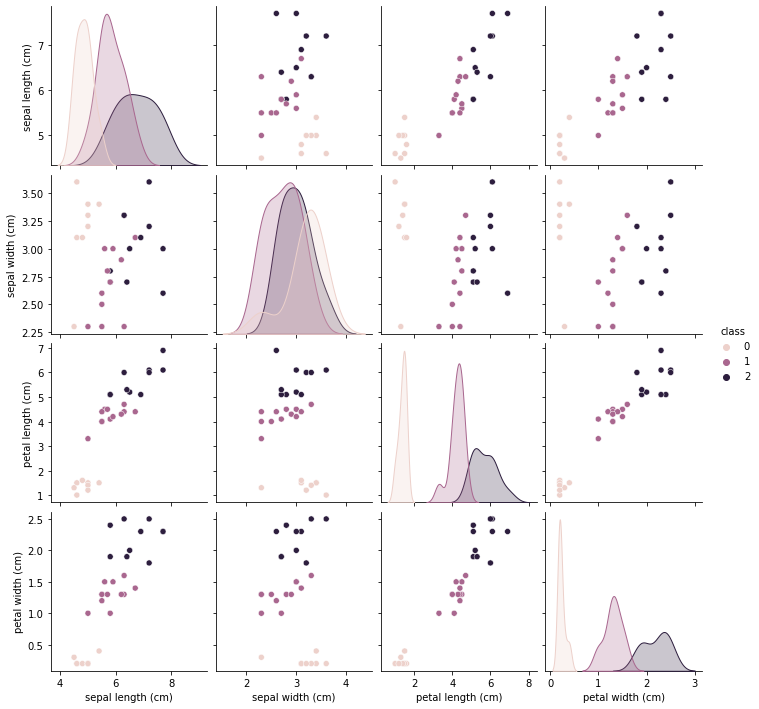

In [212]:
#pair plot of just the test data
sns.pairplot(result, hue="class")

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [152]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)



In [153]:
log.fit(X_train,y_train)

/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=10000)

In [154]:
y_train_pred = log.predict(X_train)
metrics.r2_score(y_train, y_train_pred)

0.9633997559983734

In [155]:
y_train_pred

array([0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 2])

In [156]:
y_test_pred = log.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

1.0

In [157]:
y_test_pred

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score,balanced_accuracy_score


In [159]:
accuracy_score(y_train, log.predict(X_train))

0.975

In [160]:
accuracy_score(y_test, log.predict(X_test))


1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [161]:
balanced_accuracy_score(y_train, log.predict(X_train))

0.9736842105263158

In [162]:
balanced_accuracy_score(y_test, log.predict(X_test))

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [163]:
precision_score(y_train, log.predict(X_train), average='macro')

0.9767441860465116

In [164]:
precision_score(
    y_test, log.predict(X_test), average='macro')


1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [165]:
recall_score(y_train,  log.predict(X_train),  average='macro')


0.9736842105263158

In [166]:
recall_score(y_test,  log.predict(X_test),  average='macro')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [167]:
f1_score(y_train, log.predict(X_train), average='macro')

0.9742531770919293

In [168]:
f1_score(y_test, log.predict(X_test), average='macro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [177]:
y_train_predict =  log.predict(X_train)
pd.crosstab(
    y_train["class"],
   y_train_predict
)

col_0,0,1,2
class,,,
0,42,0,0
1,0,35,3
2,0,0,40


In [183]:
 log.predict(X_train)

array([0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 2])

In [184]:
pd.crosstab(
   y_test["class"],
   log.predict(X_test)
)

col_0,0,1,2
class,,,
0,8,0,0
1,0,12,0
2,0,0,10


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [ ]:
# Lets do a cross validation of our logistic regression to be able to compare later with our
# new models

In [245]:
cross_validate(log, X, y, cv=5)["test_score"].mean()

/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

0.9733333333333334

In [246]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=666, max_depth=3)
cross_validate(clf, X, y, cv=5)["test_score"].mean()

0.9733333333333334

In [253]:
# lets try the GaussianProcessClassifier 

In [254]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train, y_train)


/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [255]:
# Train score

In [256]:
gpc.score(X_train, y_train)

0.975

In [257]:
# Test score

In [258]:
gpc.score(X_test, y_test)

1.0

In [260]:
# Cross validation score

In [261]:
cross_validate(gpc, X, y, cv=5)["test_score"].mean()

/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

0.9666666666666668